<a href="https://colab.research.google.com/github/majidahmadics/Machine-Learning-Projects/blob/main/Time_Series_Forecasting_with_ARIMA/Time_Series_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import dependencies
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

In [22]:
# Data collection using Yahoo Finance API
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data = data[["Date", "Close"]]
print(data.head())# Plotting the close price
fig = go.Figure()

# Plot training data
fig.add_trace(go.Scatter(x=data.index, y=data["Close"], mode='lines', name='Training Data'))

# Plot predictions
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name='Predictions'))

# Update layout
fig.update_layout(
    title="Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close Price",
    xaxis_rangeslider_visible=True,
    width=1000,
    height=600
)

# Show plot
fig.show()

        Date       Close
0 2023-03-10   91.010002
1 2023-03-13   91.660004
2 2023-03-14   94.250000
3 2023-03-15   96.550003
4 2023-03-16  101.070000


In [23]:
# Plotting the close price using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=data["Date"], y=data["Close"], mode='lines', name='Close Price'))

# Update layout
fig.update_layout(
    title="Google Stock Close Price",
    xaxis_title="Date",
    yaxis_title="Close Price",
    xaxis_rangeslider_visible=True
)

# Display the plot
fig.show()

<Figure size 640x480 with 0 Axes>

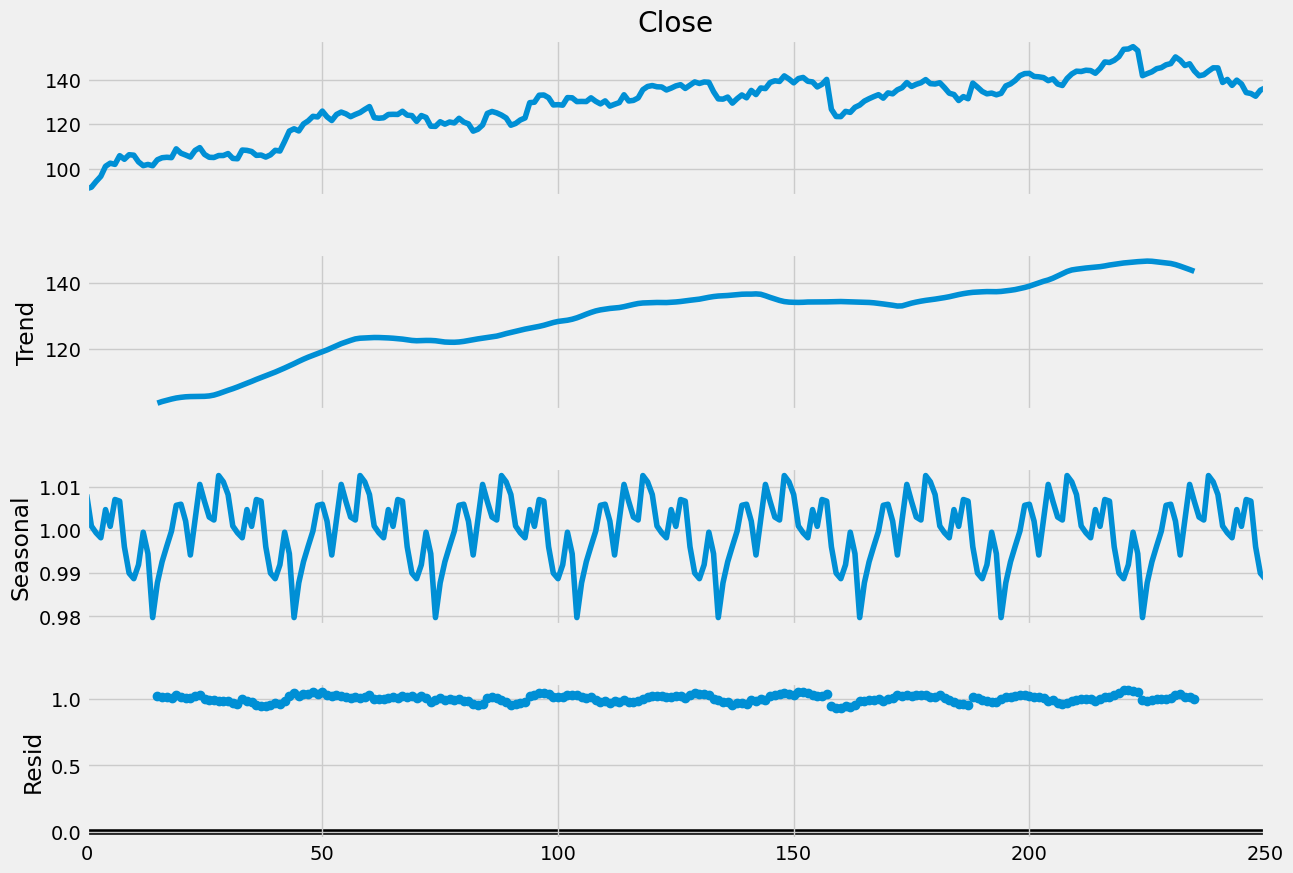

In [24]:
# Using ARIMA for Time Series Forecasting
#Understanding the data
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

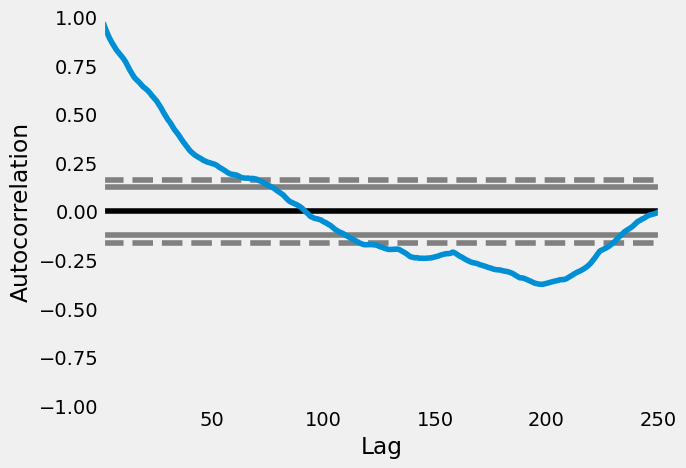

In [25]:
# Find the p, d, and q values
# p is the number of lagged values that need to be added or subtracted from the values
# d represents the number of times the data needs to differentiate to produce a stationary signal
# q is the number of lagged values for the error term added or subtracted from the values

# p = 5 according to below plot
pd.plotting.autocorrelation_plot(data["Close"])

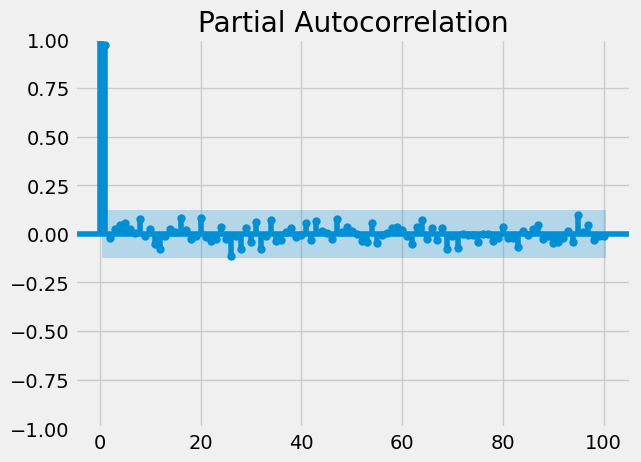

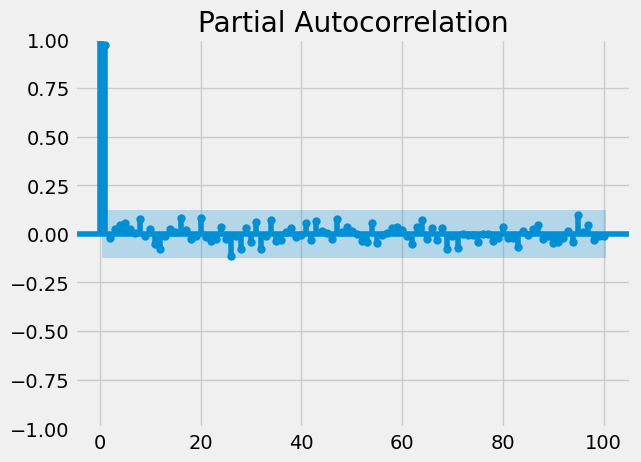

In [26]:
# p = 2 from Partial Autocorreclation
plot_pacf(data["Close"], lags = 100)

In [ ]:
# Build ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 5, 1, 2
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

In [ ]:
# Prdicting Values using ARIMA
predictions = fitted.predict()
print(predictions)

In [ ]:
# Building SARIMA Model
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

In [37]:
# Predicting values using SARIMA model
predictions = model.predict(len(data), len(data)+25)